## Ejercicio 1 Dataset Regresión Lineal – Vehicle dataset

In [30]:
# Importar librerías necesarias para el análisis, modelado y visualización
import pandas as pd  # Para manipulación de datos en formato tabular
import numpy as np  # Para cálculos numéricos y operaciones con arrays
import matplotlib.pyplot as plt  # Para crear gráficos
import seaborn as sns  # Para visualizaciones estadísticas avanzadas
from sklearn.model_selection import train_test_split  # Para dividir el dataset en entrenamiento y prueba
from sklearn.linear_model import LinearRegression  # Modelo de regresión lineal
from sklearn.metrics import mean_squared_error, r2_score  # Métricas para evaluar el modelo
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Para escalar y codificar variables
from sklearn.feature_selection import SelectKBest, f_regression  # Para selección de características
import warnings  # Para suprimir advertencias innecesarias
warnings.filterwarnings('ignore')  # Ignorar advertencias para una salida más limpia
# Cargar el dataset desde el equipo
Datos = pd.read_csv('C:/Users/Family/Videos/Car details v3.csv')

# Mostrar las primeras 5 filas para entender la estructura del dataset
print("Primeras filas del dataset:")
print(Datos.head())


Primeras filas del dataset:
                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB
None

Estadísticas descriptivas:
              year  selling_price     km_driven        seats
count  8128.000000   8.128000e+03  8.128000e+03  

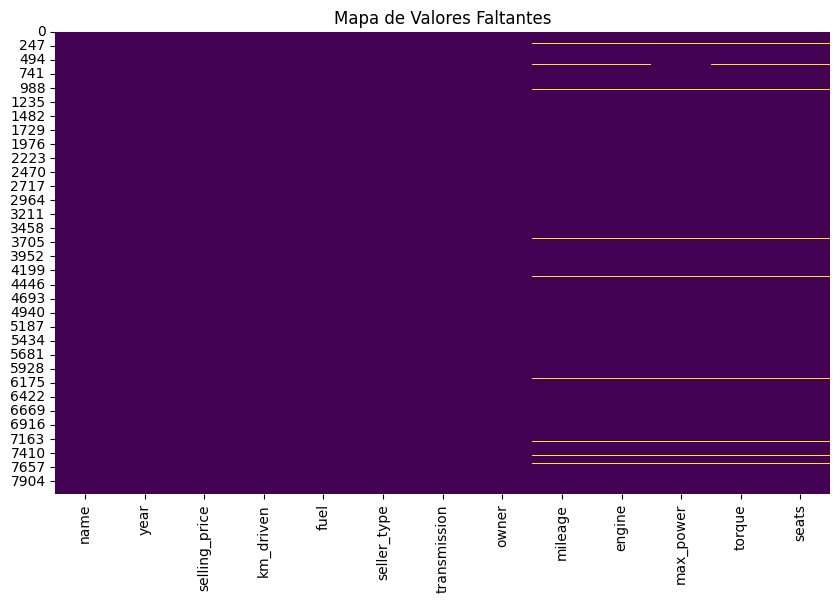

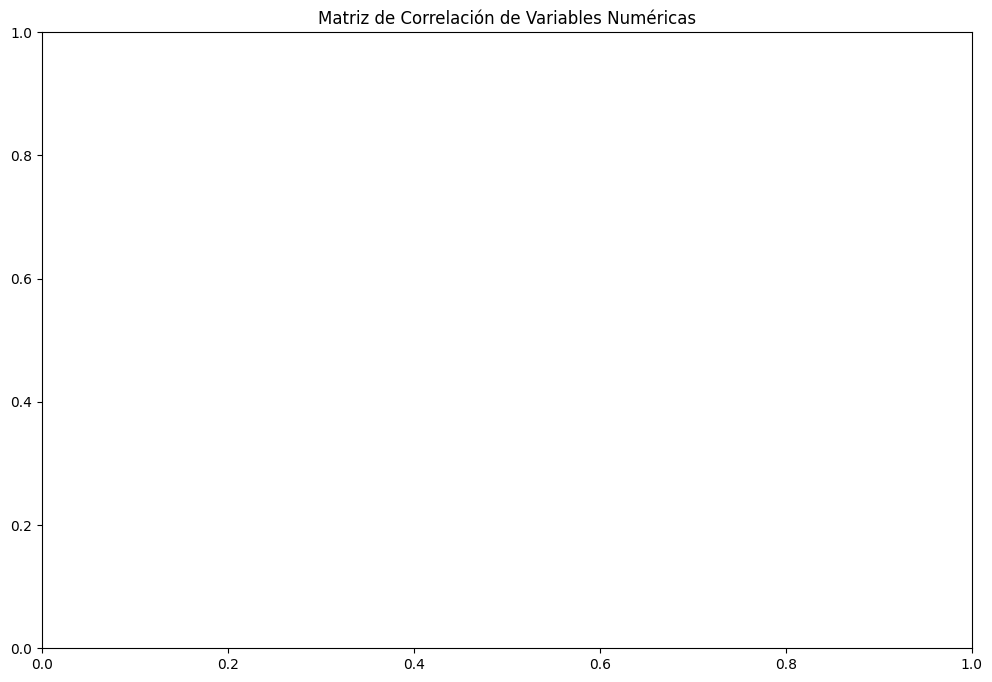

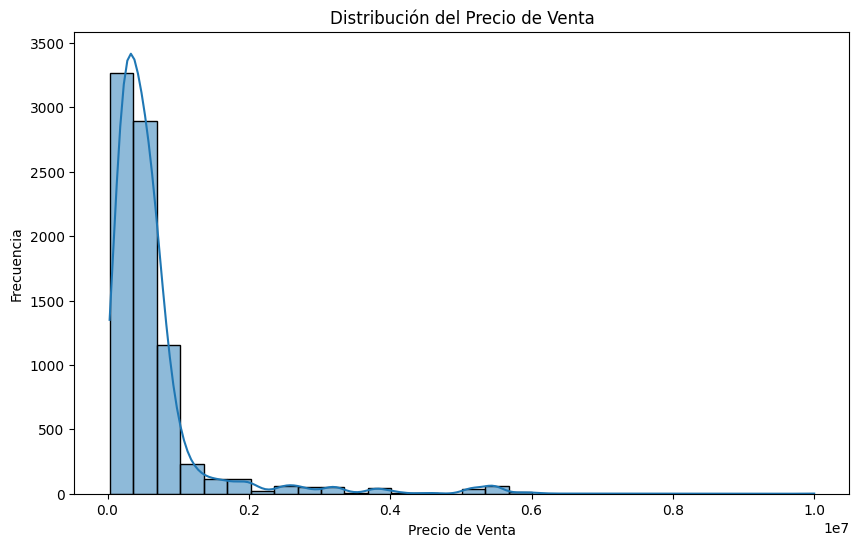

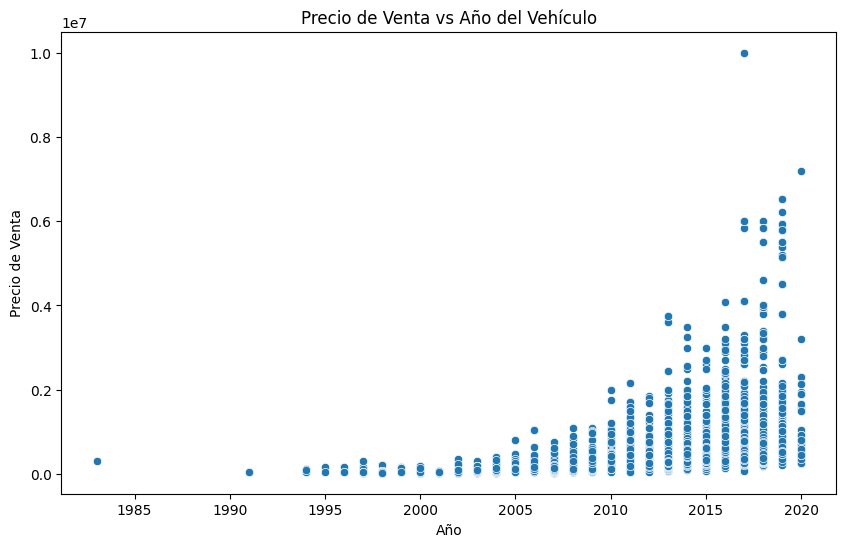

In [31]:
# --------------------------------------
# 1. Análisis Exploratorio de Datos (EDA)
# --------------------------------------


# Mostrar información general: columnas, tipos de datos y valores faltantes
print("\nInformación del dataset:")
print(Datos.info())

# Mostrar estadísticas descriptivas de las variables numéricas
print("\nEstadísticas descriptivas:")
print(Datos.describe())

# Visualizar valores faltantes en un mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(Datos.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Valores Faltantes')
plt.show()

# Visualizar la matriz de correlación para identificar relaciones entre variables numéricas
plt.figure(figsize=(12, 8))
Datos.select_dtypes(include=['int64', 'float64']).corr()
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

# Visualizar la distribución de la variable objetivo (precio de venta)
plt.figure(figsize=(10, 6))
sns.histplot(Datos['selling_price'], bins=30, kde=True)
plt.title('Distribución del Precio de Venta')
plt.xlabel('Precio de Venta')
plt.ylabel('Frecuencia')
plt.show()

# Visualizar relación entre año del vehículo y precio
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='selling_price', data=Datos)
plt.title('Precio de Venta vs Año del Vehículo')
plt.xlabel('Año')
plt.ylabel('Precio de Venta')
plt.show()


In [32]:

# --------------------------------------
# 2. Preprocesamiento de Datos
# --------------------------------------
# Eliminar filas con valores faltantes para simplificar
Datos = Datos.dropna()

# Codificar variables categóricas en valores numéricos
le = LabelEncoder()
categorical_columns = ['fuel', 'seller_type', 'transmission', 'owner']  # Columnas categóricas
for column in categorical_columns:
    Datos[column] = le.fit_transform(Datos[column])  # Transformar categorías a números (e.g., Diesel -> 0, Petrol -> 1)

# Asegurarse de que el año sea un entero
Datos['year'] = Datos['year'].astype(int)

# Seleccionar características iniciales basadas en el EDA
features = ['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner']
X = Datos[features]  # Matriz de características
y = Datos['selling_price']  # Variable objetivo

# Escalar las características para normalizarlas (mejorar el rendimiento del modelo)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Escalar a media 0 y desviación estándar 1


In [33]:

# --------------------------------------
# 3. Selección de Características
# --------------------------------------
# Usar SelectKBest para seleccionar las mejores características basadas en f_regression
selector = SelectKBest(score_func=f_regression, k=4)  # Seleccionar las 4 mejores características
X_selected = selector.fit_transform(X_scaled, y)

# Obtener los nombres de las características seleccionadas
selected_features = [features[i] for i in selector.get_support(indices=True)]
print("\nCaracterísticas seleccionadas por SelectKBest:", selected_features)

# Actualizar X_scaled para usar solo las características seleccionadas
X_scaled = X_selected



Características seleccionadas por SelectKBest: ['year', 'seller_type', 'transmission', 'owner']


In [34]:

# --------------------------------------
# 4. Dividir el Dataset
# --------------------------------------
# Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Mostrar el tamaño de los conjuntos
print("\nTamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Tamaño del conjunto de entrenamiento: (6324, 4)
Tamaño del conjunto de prueba: (1582, 4)


In [35]:

# --------------------------------------
# 5. Entrenar el Modelo
# --------------------------------------
# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)  # Ajustar el modelo a los datos de entrenamiento

# Mostrar los coeficientes del modelo para entender la importancia de cada característica
print("\nCoeficientes del modelo:", model.coef_)
print("Intercepto:", model.intercept_)


Coeficientes del modelo: [ 216475.72639035 -144368.50705359 -388432.92510394   -2661.90029013]
Intercepto: 651108.507222788


In [36]:
# --------------------------------------
# 6. Evaluar el Modelo
# --------------------------------------
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)  # Error cuadrático medio
rmse = np.sqrt(mse)  # Raíz del error cuadrático medio
r2 = r2_score(y_test, y_pred)  # Coeficiente de determinación

# Mostrar resultados
print(f"\nError Cuadrático Medio (MSE): {mse:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f}")
print(f"Coeficiente de Determinación (R²): {r2:.2f}")


Error Cuadrático Medio (MSE): 366193578606.62
Raíz del Error Cuadrático Medio (RMSE): 605139.31
Coeficiente de Determinación (R²): 0.47


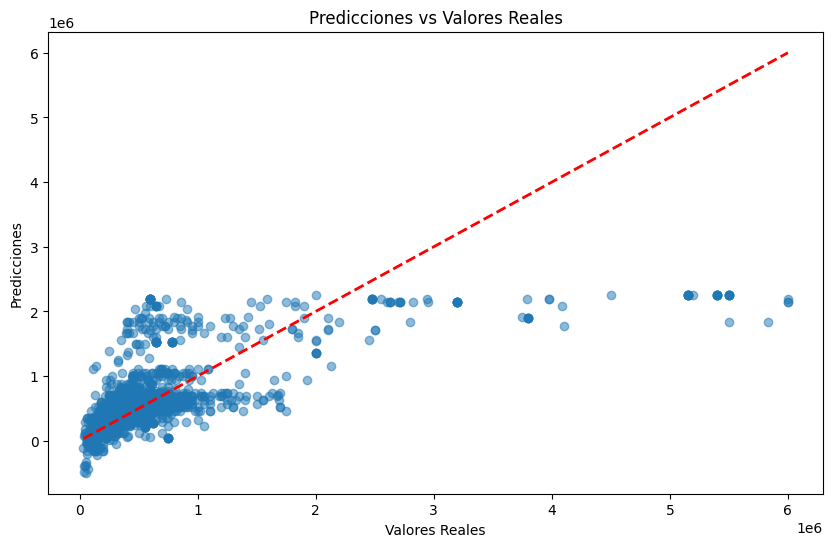

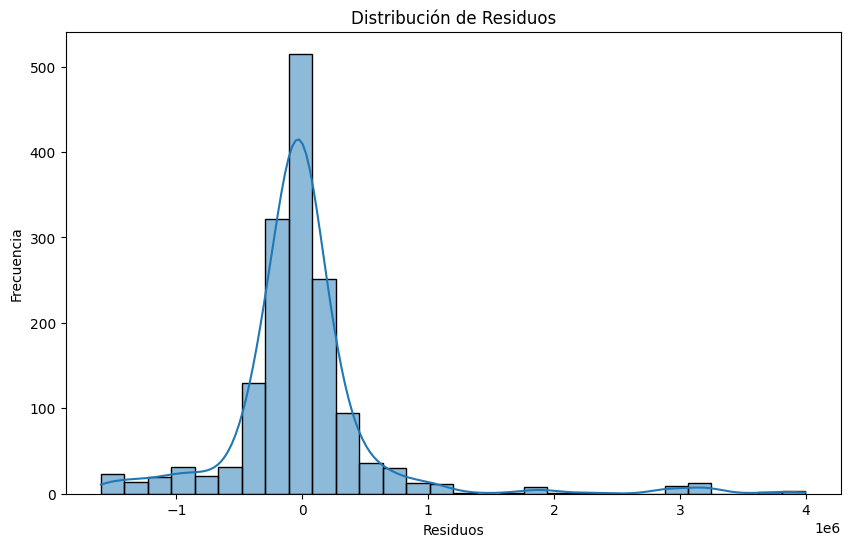

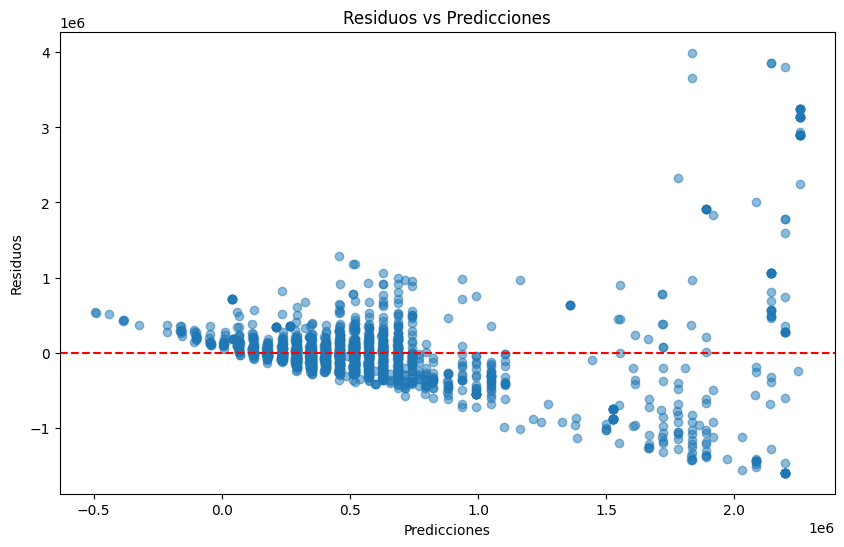

In [37]:

# --------------------------------------
# 7. Visualizaciones de Resultados
# --------------------------------------
# Gráfico de predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()

# Gráfico de distribución de residuos
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribución de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de residuos vs predicciones
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuos vs Predicciones')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.show()


In [29]:
# --------------------------------------
# 8. Interpretación y Documentación
# --------------------------------------
print("\nInterpretación de Resultados:")
print(f"- El modelo explica el {r2*100:.2f}% de la variabilidad del precio de venta.")
print(f"- El RMSE ({rmse:.2f}) indica el error promedio en las predicciones en la misma unidad que el precio.")
print("- Características seleccionadas:", selected_features)
print("- Los coeficientes indican cómo cada característica afecta el precio (positiva o negativamente).")
print("- Los gráficos de residuos sugieren si el modelo captura bien las relaciones o si hay patrones no lineales.")
print("- Posibles mejoras: incluir más características, probar modelos no lineales o ajustar hiperparámetros.")


Interpretación de Resultados:
- El modelo explica el 47.33% de la variabilidad del precio de venta.
- El RMSE (605139.31) indica el error promedio en las predicciones en la misma unidad que el precio.
- Características seleccionadas: ['year', 'seller_type', 'transmission', 'owner']
- Los coeficientes indican cómo cada característica afecta el precio (positiva o negativamente).
- Los gráficos de residuos sugieren si el modelo captura bien las relaciones o si hay patrones no lineales.
- Posibles mejoras: incluir más características, probar modelos no lineales o ajustar hiperparámetros.
